### <font color = "darkblue">Updates to Assignment</font>

#### If you were working on the older version:
* Vui lòng nhấp vào biểu tượng "Coursera" ở trên cùng bên phải để mở thư mục thư mục.
* Điều hướng đến thư mục: Tuần 3 / Phân loại dữ liệu phẳng với một lớp ẩn. Bạn có thể xem công việc trước đây của mình trong phiên bản 6b: "Phân loại dữ liệu phẳng với một lớp ẩn v6b.ipynb"

#### List of fixes and improvements
* Làm rõ rằng bộ phân loại sẽ học cách phân loại các vùng theo màu đỏ hoặc xanh lam.
* Hàm compute_cost sửa chữa np.squeeze bằng cách truyền nó dưới dạng một phao.
* hướng dẫn compute_cost làm rõ mục đích của np.squeeze.
* compute_cost làm rõ rằng tham số "tham số" là không cần thiết, nhưng được giữ trong định nghĩa hàm cho đến khi máy chấm điểm tự động cũng được cập nhật.
* nn_model loại bỏ việc trích xuất các giá trị tham số, vì toàn bộ từ điển tham số được chuyển cho các hàm được gọi.

## 1 - Packages ##

Đầu tiên, hãy nhập tất cả các gói mà bạn sẽ cần trong quá trình chuyển nhượng này.
- [numpy](https://www.numpy.org/) là gói cơ bản cho tính toán khoa học với Python.
- [sklearn](http://scikit-learn.org/stable/) cung cấp các công cụ đơn giản và hiệu quả để khai thác dữ liệu và phân tích dữ liệu.
- [matplotlib](http://matplotlib.org) là một thư viện để vẽ đồ thị bằng Python.
- testCases cung cấp một số ví dụ kiểm tra để đánh giá tính đúng đắn của các chức năng của bạn
- planar_utils cung cấp các hàm hữu ích khác nhau được sử dụng trong bài tập này

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##
Đầu tiên, hãy lấy tập dữ liệu mà bạn sẽ làm việc. Đoạn mã sau sẽ tải tập dữ liệu 2 lớp "hoa" vào các biến `X` và` Y`.

In [2]:
X, Y = load_planar_dataset()

Hình dung tập dữ liệu bằng matplotlib. Dữ liệu trông giống như một "bông hoa" với một số điểm màu đỏ (nhãn y = 0) và một số điểm màu xanh lam (y = 1). Mục tiêu của bạn là xây dựng một mô hình để phù hợp với dữ liệu này. Nói cách khác, chúng tôi muốn bộ phân loại xác định các vùng là màu đỏ hoặc xanh lam.

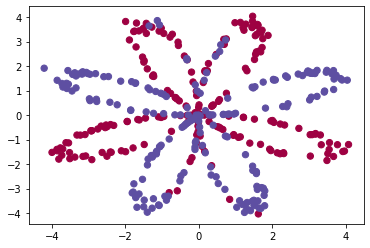

In [3]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Bạn có:
     - một mảng (ma trận) X chứa các tính năng của bạn (x1, x2)
     - một mảng (vectơ) Y chứa các nhãn của bạn (đỏ: 0, xanh lam: 1).

Trước tiên, chúng ta hãy hiểu rõ hơn về dữ liệu của chúng ta như thế nào.

**Bài tập**: 
Bạn có bao nhiêu ví dụ đào tạo? Ngoài ra, `shap` của các biến` X` và `Y` là gì?

**Gợi ý**: Làm thế nào để bạn có được hình dạng của một mảng numpy? [(trợ giúp)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [4]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = np.size(X[0])  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


**Kết quả mong đợi**:
       
<table style="width:20%">
  <tr>
    <td>shape of X**</td>
    <td> (2, 400) </td> 
  </tr>
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td> 
  </tr> 
    <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
  
</table>

## 3 - Simple Logistic Regression
Trước khi xây dựng một mạng nơ-ron đầy đủ, trước tiên hãy xem hồi quy logistic hoạt động như thế nào đối với vấn đề này. Bạn có thể sử dụng các chức năng có sẵn của sklearn để làm điều đó. Chạy mã bên dưới để đào tạo bộ phân loại hồi quy logistic trên tập dữ liệu.

In [8]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T,Y.T);

C:\Users\truon\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Bây giờ bạn có thể vẽ ranh giới quyết định của các mô hình này. Chạy mã bên dưới.

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


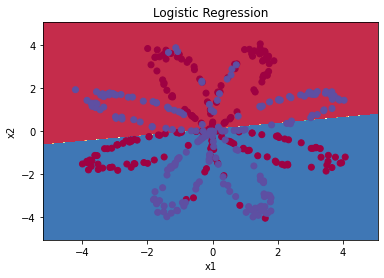

In [11]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Kết quả mong đợi**:

<table style="width:20%">
  <tr>
    <td>Accuracy</td>
    <td> 47% </td> 
  </tr>
  
</table>

**Giải thích**: Tập dữ liệu không thể phân tách tuyến tính, vì vậy hồi quy logistic không hoạt động tốt. Hy vọng rằng mạng nơ-ron sẽ hoạt động tốt hơn. Hãy thử điều này ngay bây giờ!

## 4 - Neural Network model

Hồi quy logistic không hoạt động tốt trên "tập dữ liệu hoa". Bạn sẽ đào tạo một Mạng thần kinh với một lớp ẩn duy nhất.

**Đây là mô hình của chúng tôi**:
<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Công thức toán**:

Cho 1 ví dụ $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Với các dự đoán trên tất cả các ví dụ, bạn cũng có thể tính toán chi phí $J$ như trên: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Nhắc nhở**: Phương pháp chung để xây dựng Mạng thần kinh là:

     1. Xác định cấu trúc mạng nơ-ron (# đơn vị đầu vào, # đơn vị ẩn, v.v.).
     2. Khởi tạo các thông số của mô hình
     3. Vòng lặp:
         - Thực hiện forward propagation
         - Tính toán loss
         - Thực hiện truyền ngược để có được các gradient
         - Cập nhật các thông số (gradient descent)

Bạn thường xây dựng các hàm trợ giúp để tính toán các bước 1-3 và sau đó hợp nhất chúng thành một hàm mà chúng tôi gọi là `nn_model ()`. Khi bạn đã tạo xong `nn_model () 'và tìm hiểu các tham số phù hợp, bạn có thể đưa ra dự đoán trên dữ liệu mới.

### 4.1 - Defining the neural network structure ####
**Bài tập**: Xác định ba biến:

     - n_x: kích thước của lớp đầu vào
     - n_h: kích thước của lớp ẩn (đặt giá trị này thành 4)
     - n_y: kích thước của lớp đầu ra

**Gợi ý**: Sử dụng hình dạng của X và Y để tìm n_x và n_y. Ngoài ra, mã cứng kích thước lớp ẩn là 4.

In [12]:
# GRADED FUNCTION: layer_sizes

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [13]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


**Kết quả mong đợi** (đây không phải là kích thước bạn sẽ sử dụng cho mạng của mình, chúng chỉ được sử dụng để đánh giá chức năng bạn vừa mã hóa).

<table style="width:20%">
  <tr>
    <td>n_x</td>
    <td> 5 </td> 
  </tr>
    <tr>
    <td>n_h</td>
    <td> 4 </td> 
  </tr> 
    <tr>
    <td>n_y</td>
    <td> 2 </td> 
  </tr> 
</table>

**Bài tập**: Thực hiện hàm `initialize_parameters ()`.

**Hướng dẫn**:
- Đảm bảo kích thước các thông số của bạn là đúng. Tham khảo hình mạng nơ-ron ở trên nếu cần.
- Bạn sẽ khởi tạo các ma trận trọng số với các giá trị ngẫu nhiên.
     - Sử dụng: `np.random.randn (a, b) * 0.01` để khởi tạo ngẫu nhiên một ma trận có dạng (a, b).
- Bạn sẽ khởi tạo các vectơ thiên vị dưới dạng số không.
     - Sử dụng: `np.zeros ((a, b))` để khởi tạo ma trận hình (a, b) với các số không.

In [14]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [15]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


**Kết quả mong đợi**:

<table style="width:90%">
  <tr>
    <td>W1</td>
    <td> [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]] </td> 
  </tr>
  <tr>
    <td>b1</td>
    <td> [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]] </td> 
  </tr> 
  <tr>
    <td>W2</td>
    <td> [[-0.01057952 -0.00909008  0.00551454  0.02292208]]</td> 
  </tr>
  <tr>
    <td>b2</td>
    <td> [[ 0.]] </td> 
  </tr>  
</table>



### 4.3 - The Loop ####
**Câu hỏi**: Thực hiện `forward_propagation ()`.

**Hướng dẫn**:
- Nhìn ở trên vào biểu diễn toán học của trình phân loại của bạn.
- Bạn có thể sử dụng hàm `sigmoid ()`. Nó được tích hợp sẵn (nhập) trong sổ ghi chép.
- Bạn có thể sử dụng hàm `np.tanh ()`. Nó là một phần của thư viện numpy.
- Các bước bạn phải thực hiện là:
     1. Lấy từng tham số từ "tham số" từ điển (là đầu ra của `khởi tạo_parameters ()`) bằng cách sử dụng `parameters[".."]`.
     2. Thực hiện Truyền dẫn Chuyển tiếp. Tính $ Z ^ {[1]}, A ^ {[1]}, Z ^ {[2]} $ và $ A ^ {[2]} $ (vectơ của tất cả các dự đoán của bạn trên tất cả các ví dụ trong khóa đào tạo bộ).
- Các giá trị cần thiết trong lan truyền ngược được lưu trữ trong "` cache` ". `Cache` sẽ được cung cấp như một đầu vào cho hàm backpropagation.

In [16]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    ### START CODE HERE ### (≈ 4 lines of code)
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh((Z1))
    Z2 = np.dot(W2,A1)+b2
    A2 = 1/(1+np.exp(-Z2))
    ### END CODE HERE ###
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [17]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
#Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


**Kết quả mong đợi**:
<table style="width:50%">
  <tr>
    <td> 0.262818640198 0.091999045227 -1.30766601287 0.212877681719 </td> 
  </tr>
</table>

Bây giờ bạn đã tính toán $A^{[2]}$ (trong python biến"`A2`"), trong đó có $a^{[2](i)}$ đối với mọi ví dụ, bạn có thể tính hàm chi phí như sau:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$
**Bài tập**: Thực hiện `compute_cost ()` để tính giá trị của chi phí $ J $.
**Hướng dẫn**:
- Có nhiều cách để thực hiện cross-entropy loss. Để giúp bạn, chúng tôi cung cấp cho bạn cách chúng tôi sẽ triển khai
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # không cần sử dụng vòng lặp for!
```
(bạn có thể sử dụng `np.multiply ()` và sau đó là `np.sum ()` hoặc trực tiếp `np.dot ()`).
Lưu ý rằng nếu bạn sử dụng `np.multiply` theo sau là` np.sum` thì kết quả cuối cùng sẽ là kiểu `float`, trong khi nếu bạn sử dụng` np.dot`, kết quả sẽ là một mảng 2D numpy. Chúng ta có thể sử dụng `np.squeeze ()` để loại bỏ các kích thước thừa (trong trường hợp float đơn lẻ, điều này sẽ được giảm xuống một mảng không có thứ nguyên). Chúng ta có thể ép kiểu mảng dưới dạng `float` bằng cách sử dụng` float () `.

In [18]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = (np.multiply(np.log(A2),Y)+np.multiply((1-Y),np.log(1-(A2))))
    cost = - (1/m)*np.sum(logprobs)
    ### END CODE HERE ###
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [19]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


**Kết quả mong đợi**:
<table style="width:20%">
  <tr>
    <td>cost</td>
    <td> 0.693058761... </td> 
  </tr>
  
</table>

Sử dụng bộ đệm được tính toán trong quá trình truyền tiến, bây giờ bạn có thể triển khai truyền ngược.

**Câu hỏi**: Thực hiện hàm `back_propagation ()`.

**Hướng dẫn**:
Nhân giống ngược thường là phần khó nhất (toán học nhất) trong học sâu. Để giúp bạn, đây một lần nữa là slide từ bài giảng về lan truyền ngược. Bạn sẽ muốn sử dụng sáu phương trình ở bên phải của trang trình bày này, vì bạn đang xây dựng một triển khai được vector hóa.

<img src="images/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Lời khuyên:
     - Để tính toán dZ1, bạn sẽ cần phải tính toán $g^{[1]'}(Z^{[1]})$. Từ $g^{[1]}(.)$ là hàm kích hoạt tanh, Nếu $a = g^{[1]}(z)$ thì $g^{[1]'}(z) = 1-a^2$. Vì vậy, bạn có thể tính toán 
    $g^{[1]'}(Z^{[1]})$ sử dụng `(1 - np.power(A1, 2))`.

In [20]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    ### START CODE HERE ### (≈ 2 lines of code)
    W1 =parameters["W1"]
    W2 =parameters["W2"]
    ### END CODE HERE ###
        
    # Retrieve also A1 and A2 from dictionary "cache".
    ### START CODE HERE ### (≈ 2 lines of code)
    A1 = cache["A1"]
    A2 = cache["A2"]
    ### END CODE HERE ###
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    ### START CODE HERE ### (≈ 6 lines of code, corresponding to 6 equations on slide above)
    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [21]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Kết quả mong đợi**:



<table style="width:80%">
  <tr>
    <td>dW1</td>
    <td> [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]] </td> 
  </tr>
  
  <tr>
    <td>db1</td>
    <td>  [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]] </td> 
  </tr>
  
  <tr>
    <td>dW2</td>
    <td> [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]] </td> 
  </tr>
  

  <tr>
    <td>db2</td>
    <td> [[-0.16655712]] </td> 
  </tr>
  
</table>

**Câu hỏi**: Thực hiện quy tắc cập nhật. Sử dụng gradient descent. Bạn phải sử dụng (dW1, db1, dW2, db2) để cập nhật (W1, b1, W2, b2).

**Tính gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$  trong đó $\alpha$ là learning rate và $\theta$ đại diện cho một tham số.

**Hình minh họa**: Thuật toán giảm dần độ dốc với tỷ lệ học tốt (hội tụ) và tỷ lệ học kém (phân kỳ). Hình ảnh lịch sự của Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">

In [22]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1-learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate *dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [23]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


**Kết quả mong đợi**:


<table style="width:80%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]</td> 
  </tr>
  <tr>
    <td>**b1**</td>
    <td> [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]</td> 
  </tr>  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td> 
  </tr>
  <tr>
    <td>**b2**</td>
    <td> [[ 0.00010457]] </td> 
  </tr>  
</table>  

### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model() ####
**Câu hỏi**: Xây dựng mô hình mạng nơ-ron của bạn trong `nn_model ()`.

**Hướng dẫn**: Mô hình mạng nơron phải sử dụng các chức năng trước đó theo đúng thứ tự.

In [24]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache,X,Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [25]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000218
Cost after iteration 2000: 0.000107
Cost after iteration 3000: 0.000071
Cost after iteration 4000: 0.000053
Cost after iteration 5000: 0.000042
Cost after iteration 6000: 0.000035
Cost after iteration 7000: 0.000030
Cost after iteration 8000: 0.000026
Cost after iteration 9000: 0.000023
W1 = [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]
b1 = [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]]
W2 = [[-2.45566237 -3.27042274  2.00784958  3.36773273]]
b2 = [[0.20459656]]


**Kết quả mong đợi**:

<table style="width:90%">

<tr> 
    <td> 
        cost after iteration 0
    </td>
    <td> 
        0.692739
    </td>
</tr>

<tr> 
    <td> 
        <center> $\vdots$ </center>
    </td>
    <td> 
        <center> $\vdots$ </center>
    </td>
</tr>

  <tr>
    <td>W1</td>
    <td> [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]</td> 
  </tr>
  
  <tr>
    <td>b1</td>
    <td> [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]] </td> 
  </tr>
  
  <tr>
    <td>W2</td>
    <td> [[-2.45566237 -3.27042274  2.00784958  3.36773273]] </td> 
  </tr>
  

  <tr>
    <td>b2</td>
    <td> [[ 0.20459656]] </td> 
  </tr>
  
</table>  

### 4.5 Predictions
**Câu hỏi**: Sử dụng mô hình của bạn để dự đoán bằng cách xây dựng dự đoán ().
Sử dụng sự lan truyền thuận để dự đoán kết quả.
**Nhắc nhở**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    


Ví dụ: nếu bạn muốn đặt các mục nhập của ma trận X thành 0 và 1 dựa trên ngưỡng, bạn sẽ thực hiện: `` X_new = (X> ngưỡng) ''

In [26]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###
    
    return predictions

In [27]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


**Kết quả mong đợi**: 


<table style="width:40%">
  <tr>
    <td>predictions mean</td>
    <td> 0.666666666667 </td> 
  </tr>
  
</table>

Đã đến lúc chạy mô hình và xem nó hoạt động như thế nào trên tập dữ liệu phẳng. Chạy mã sau để kiểm tra mô hình của bạn với một lớp ẩn duy nhất gồm $ n_h $ đơn vị ẩn.

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219482
Cost after iteration 9000: 0.218615


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

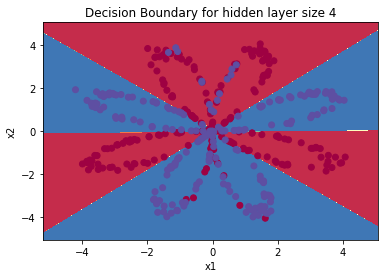

In [29]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

**Kết quả mong đợi**:

<table style="width:40%">
  <tr>
    <td>Cost after iteration 9000</td>
    <td> 0.218607 </td> 
  </tr>
  
</table>


In [30]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


**Kết quả mong đợi**: 

<table style="width:15%">
  <tr>
    <td>Accuracy</td>
    <td> 90% </td> 
  </tr>
</table>

Độ chính xác thực sự cao so với hồi quy logistic. Mô hình đã học các mẫu lá của bông hoa! Mạng nơ-ron có thể tìm hiểu các ranh giới quyết định phi tuyến tính thậm chí cao, không giống như hồi quy logistic.

Bây giờ, chúng ta hãy thử một số kích thước lớp ẩn.

### 4.6 - Tuning hidden layer size (optional/ungraded exercise) ###

Chạy đoạn mã sau. Có thể mất 1-2 phút. Bạn sẽ quan sát các hành vi khác nhau của mô hình đối với các kích thước lớp ẩn khác nhau.

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %


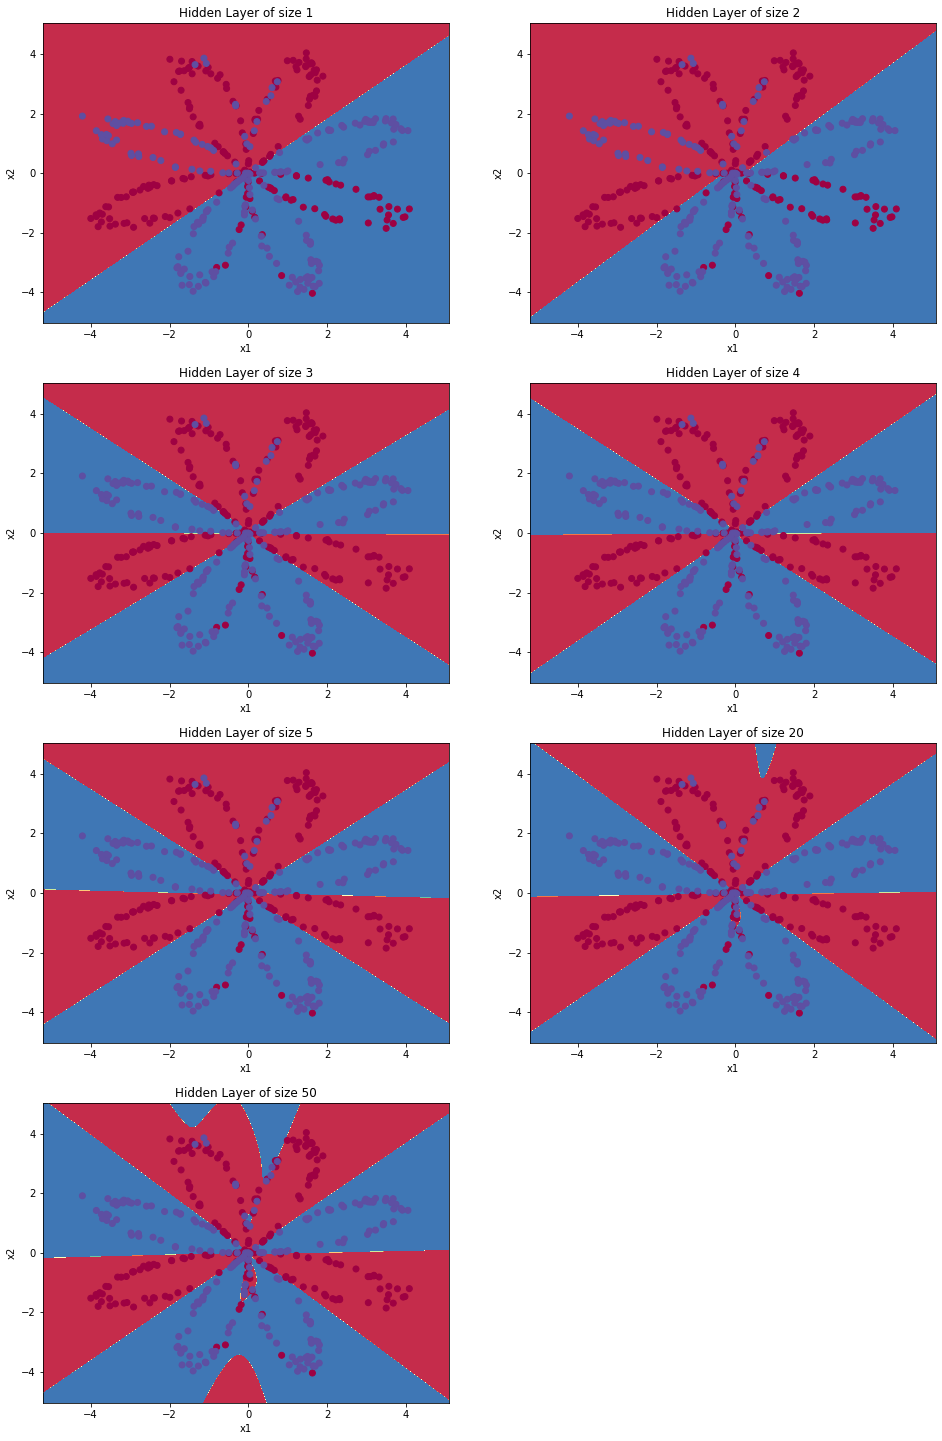

In [32]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Diễn dịch**:
- Các mô hình lớn hơn (với nhiều đơn vị ẩn hơn) có thể phù hợp với tập huấn luyện tốt hơn, cho đến khi cuối cùng các mô hình lớn nhất trang bị quá nhiều dữ liệu.
- Kích thước lớp ẩn tốt nhất dường như nằm trong khoảng n_h = 5. Thật vậy, một giá trị xung quanh đây có vẻ phù hợp với dữ liệu mà không gây ra sự trang bị quá mức đáng chú ý.
- Bạn cũng sẽ học sau về chính quy hóa, cho phép bạn sử dụng các mô hình rất lớn (chẳng hạn như n_h = 50) mà không cần trang bị quá nhiều.

**Câu hỏi tùy chọn**:

**Lưu ý**: Hãy nhớ gửi bài tập bằng cách nhấp vào nút "Gửi bài tập" màu xanh lam ở phía trên bên phải.

Một số câu hỏi tùy chọn / không được phân loại mà bạn có thể khám phá nếu muốn:
- Điều gì xảy ra khi bạn thay đổi kích hoạt tanh thành kích hoạt sigmoid hoặc kích hoạt ReLU?
- Chơi với learning_rate. Điều gì xảy ra?
- Nếu chúng ta thay đổi tập dữ liệu thì sao? (Xem phần 5 bên dưới!)

<font color = 'blue'>
Bạn đã học cách:
    
- Xây dựng một mạng nơ-ron hoàn chỉnh với một lớp ẩn
- Sử dụng tốt đơn vị phi tuyến tính
- Thực hiện việc truyền bá và nhân giống ngược về phía trước, và đào tạo một mạng lưới thần kinh
- Xem tác động của việc thay đổi kích thước lớp ẩn, bao gồm cả việc trang bị quá nhiều.

Nice work! 

## 5) Performance on other datasets

If you want, you can rerun the whole notebook (minus the dataset part) for each of the following datasets.

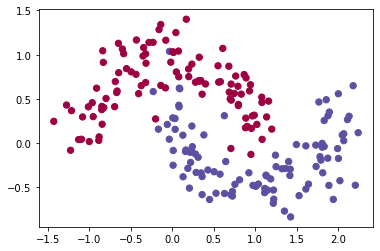

In [33]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

Chúc mừng bạn đã hoàn thành Bài tập lập trình này!

Tài liệu tham khảo:
- http://scs.ryerson.ca/~aharley/neural-networks/
- http://cs231n.github.io/neural-networks-case-study/